# Working with time series, frequency series, and unit conversion

In this notebook, we show some of the most useful features of the [timeseries](../series.rst) module. To do so, we will analyze a fake gravitational-wave signal. We will also show the [frequencyseries](../series.rst) module and the [unitconv](../unitconv.rst) modules.

First, let's generate this signal. 

(This notebook is meant to be converted in Sphinx documentation and not used directly.)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from kuibit import timeseries as ts
from kuibit import series
from kuibit import unitconv as uc
from kuibit.gw_utils import luminosity_distance_to_redshift

%matplotlib inline

In [2]:
t = np.linspace(0, 20, 5000)
y = np.sin(t)

# Generate a TimeSeries by providing the times and the values of the series
gw = ts.TimeSeries(t, y)

To access the times and the values, use ``gw.t`` and ``gw.y``. You can also iterate over the series with a for loop yielding the elements `(t, y)` at each iteration of the loop. For example.

In [3]:
for tt, yy in gw:
    print(tt, yy)

0.0 0.0
0.004000800160032006 0.004000789486971321
0.008001600320064013 0.008001514935783532
0.012002400480096018 0.012002112309302542
0.016003200640128026 0.016002517572444287
0.020004000800160033 0.020002666693199687
0.024004800960192037 0.024002495643659576
0.028005601120224044 0.028001940401039562
0.03200640128025605 0.03200093694870479
0.03600720144028806 0.03599942127719461
0.040008001600320066 0.03999732938524717
0.04400880176035207 0.0439945972808238
0.048009601920384073 0.04799116098213332
0.05201040208041608 0.05198695651865616
0.05601120224044809 0.055981919932168285
0.060012002400480095 0.059975987277764924
0.0640128025605121 0.06396909462488413
0.0680136027205441 0.06796117805833003
0.07201440288057612 0.07195217367929596
0.07601520304060812 0.07594201760638712
0.08001600320064013 0.07993064597664322
0.08401680336067213 0.08391799494656059
0.08801760352070415 0.08790400069311417
0.09201840368073615 0.09188859941477902
0.09601920384076815 0.09587172733255157
0.10002000400080

3.6247249449889978 -0.46455523225262274
3.62872574514903 -0.4680943900420435
3.632726545309062 -0.4716260553345145
3.636727345469094 -0.47515017160085704
3.640728145629126 -0.47866668243272503
3.644728945789158 -0.48217553154350773
3.64872974594919 -0.48567666276923094
3.652730546109222 -0.4891700200694558
3.656731346269254 -0.49265554752817603
3.660732146429286 -0.4961331893547125
3.664732946589318 -0.49960288988460666
3.66873374674935 -0.5030645935805115
3.672734546909382 -0.5065182450330801
3.676735347069414 -0.5099637889618529
3.680736147229446 -0.5134011702161426
3.684736947389478 -0.5168303337759168
3.68873774754951 -0.5202512247526784
3.692738547709542 -0.5236637883903444
3.696739347869574 -0.5270679700661227
3.700740148029606 -0.5304637152913859
3.704740948189638 -0.5338509697125434
3.70874174834967 -0.537229679111912
3.712742548509702 -0.5405997894085832
3.716743348669734 -0.5439612466592889
3.720744148829766 -0.5473139970592653
3.724744948989798 -0.5506579869431133
3.72874574


6.649329865973194 0.3580182200042251
6.653330666133226 0.36175095027156484
6.657331466293258 0.36547789021552296
6.66133226645329 0.3691989801812803
6.665333066613322 0.3729141606076547
6.669333866773354 0.37662337202805446
6.673334666933386 0.38032655507142993
6.677335467093418 0.38402365046322406
6.68133626725345 0.3877145990263209
6.685337067413482 0.39139934168199314
6.6893378675735145 0.3950778194508475
6.6933386677335465 0.398749973453769
6.6973394678935785 0.402415744912863
6.7013402680536105 0.40607507515239655
6.7053410682136425 0.4097279055997372
6.7093418683736745 0.4133741777862906
6.7133426685337065 0.41701383334843645
6.7173434686937386 0.42064681402846277
6.721344268853771 0.42427306167549816
6.725345069013803 0.4278925182464427
6.729345869173835 0.43150512580689704
6.733346669333867 0.4351108265320898
6.737347469493899 0.4387095627078029
6.741348269653931 0.4423012767312956
6.745349069813963 0.44588591111222625
6.749349869973995 0.4494634084735728
6.753350670134027 0.4

-0.6722578672447695
10.166033206641329 -0.6752143397764542
10.17003400680136 -0.6781600045704499
10.174034806961393 -0.6810948144773251
10.178035607121425 -0.6840187225213954
10.182036407281457 -0.686931681901476
10.186037207441489 -0.6898336459916304
10.19003800760152 -0.692724568341917
10.194038807761553 -0.6956044026791324
10.198039607921585 -0.6984731029075523
10.202040408081617 -0.7013306231096691
10.206041208241649 -0.7041769175469269
10.21004200840168 -0.7070119406604537
10.214042808561713 -0.7098356470717908
10.218043608721745 -0.7126479915836186
10.222044408881777 -0.7154489291804804
10.226045209041809 -0.7182384150295035
10.23004600920184 -0.7210164044811155
10.234046809361873 -0.72378285306976
10.238047609521905 -0.7265377165146082
10.242048409681937 -0.7292809507202673
10.246049209841969 -0.7320125117774866
10.250050010002001 -0.7347323559638603
10.254050810162033 -0.7374404397445274
10.258051610322065 -0.7401367197728681
10.262052410482097 -0.7428211528911981
10.2660532106

0.8284519492159825
13.546709341868373 0.8306860017040892
13.550710142028406 0.8329067579159184
13.554710942188438 0.8351141823052008
13.55871174234847 0.837308239539062
13.562712542508502 0.8394888944985864
13.566713342668534 0.8416561122793812
13.570714142828566 0.8438098581921336
13.574714942988598 0.845950097763167
13.57871574314863 0.8480767967349924
13.582716543308662 0.8501899210668564
13.586717343468694 0.852289436935287
13.590718143628726 0.8543753107346341
13.594718943788758 0.8564475090776079
13.59871974394879 0.858505998795813
13.602720544108822 0.8605507469402798
13.606721344268854 0.862581720781991
13.610722144428886 0.8645988878124067
13.614722944588918 0.8666022157439834
13.61872374474895 0.8685916725106922
13.622724544908982 0.8705672262685307
13.626725345069014 0.8725288453960336
13.630726145229046 0.8744764984947787
13.634726945389078 0.8764101543898893
13.63872774554911 0.8783297821305333
13.642728545709142 0.8802353509904183
13.646729345869174 0.8821268304682842
13.

 -0.8517845244700843
16.73134626925385 -0.8538736902133872
16.735347069413884 -0.8559491885294457
16.739347869573916 -0.858010986197044
16.743348669733948 -0.8600590502142638
16.74734946989398 -0.862093347799013
16.75135027005401 -0.8641138463895506
16.755351070214044 -0.8661205136450069
16.759351870374076 -0.868113317445902
16.763352670534108 -0.8700922258946603
16.76735347069414 -0.8720572073161198
16.77135427085417 -0.8740082302580401
16.775355071014204 -0.8759452634916054
16.779355871174236 -0.8778682760119247
16.783356671334268 -0.8797772370385278
16.7873574714943 -0.8816721160158578
16.79135827165433 -0.883552882613761
16.795359071814364 -0.8854195067279711
16.799359871974396 -0.8872719584805923
16.803360672134428 -0.8891102082205768
16.80736147229446 -0.8909342265242
16.81136227245449 -0.8927439841955302
16.815363072614524 -0.8945394522668979
16.819363872774556 -0.8963206019993576
16.823364672934588 -0.8980874048831489
16.82736547309462 -0.8998398326381523
16.831366273254652 -0.

0.12590420588818552
18.97979595919184 0.12987215107262573
18.983796759351872 0.1338380174739904
18.987797559511904 0.13780174161311262
18.991798359671936 0.14176326004511539
18.995799159831968 0.145722509360427
18.999799959992 0.14967942618579613
19.003800760152032 0.15363394718530624
19.007801560312064 0.1575860090613892
19.011802360472096 0.1615355485558386
19.015803160632128 0.16548250245082222
19.01980396079216 0.16942680756989392
19.023804760952192 0.17336840077900487
19.027805561112224 0.17730721898751411
19.031806361272256 0.18124319914919843
19.035807161432288 0.1851762782632614
19.03980796159232 0.18910639337534196
19.043808761752352 0.1930334815785219
19.047809561912384 0.19695748001433291
19.051810362072416 0.20087832587376267
19.055811162232448 0.20479595639826023
19.05981196239248 0.20871030888074046
19.063812762552512 0.21262132066658782
19.067813562712544 0.21652892915465927
19.071814362872576 0.22043307179828625
19.07581516303261 0.22433368610627577
19.07981596319264 0.

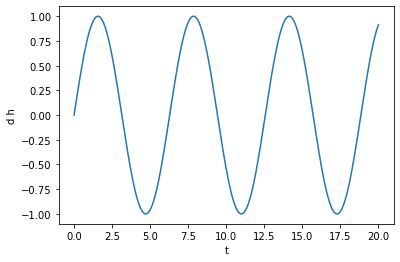

In [4]:
def plot(ser, lab1="d h", lab2="t", *args, **kwargs):
    """Plot Series ser with labels"""
    plt.ylabel(lab1)
    plt.xlabel(lab2)
    plt.plot(ser, *args, **kwargs)
    
plot(gw)

Let's make this more interesting: we square the signal and add Gaussian noise. [TimeSeries](../timeseries_ref.html#kuibit.timeseries.TimeSeries) support directly using all the basic mathematical operations in Python and NumPy, so we can easily square the signal and add another TimeSeries to it.

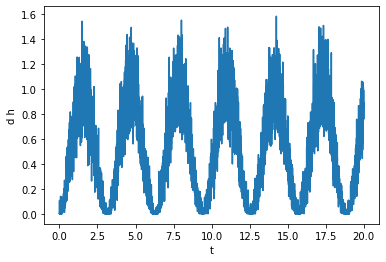

In [5]:
noise = np.random.normal(0, 0.1, len(gw))  # Here we used len() on the TimeSeries
noise_ts = ts.TimeSeries(t, noise)

gw += noise_ts
gw **= 2

plot(gw)

To analyze this signal, first we will smooth it. To do that, we will use the [savgol_smooth_time](../timeseries_ref.html#kuibit.timeseries.TimeSeries.savgol_smooth_time) method, which is a generalized "running average" filter. This method requires length of time over which we want to smooth the data.

In [TimeSeries](../timeseries_ref.html#kuibit.timeseries.TimeSeries) there are always two different methods to do the same task, one with imperative verb (e.g., smooth), and the other with the past tense (e.g., smoothed). The first modifies the data, the second returns a new `TimeSeries` with the operation applied. Here, we will find what smoothing length to use by trial and error, so we will use the second method. 

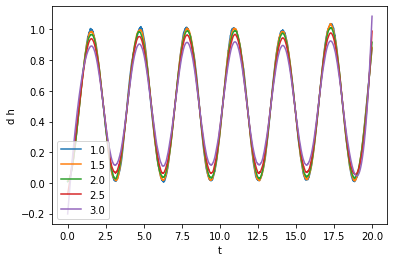

In [6]:
tsmooth = np.linspace(1, 3, 5)

for tsm in tsmooth:
    smoothed = gw.savgol_smoothed_time(tsm)
    plot(smoothed, label=tsm)
plt.legend()

From visual inspection it looks like that ``tsmooth = 1.5`` will work yield a clean series faithful to the original one.

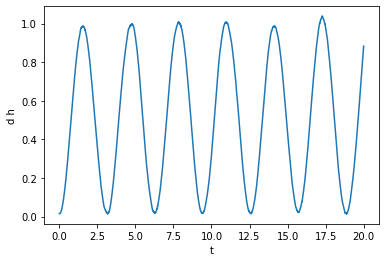

In [7]:
gw.savgol_smooth_time(1.5)
plot(gw)

Next, for fun, we can compute integrals and derivatives. For instance, we can compute what is the integral from 5 to 10.

The integral from 5 to 10 is 2.2064


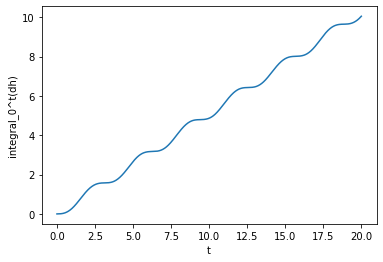

In [8]:
gw_int = gw.integrated()
a = 5
b = 10
print(f"The integral from {a} to {b} is {gw_int(b) - gw_int(a):.4f}")
plot(gw_int, lab1="integral_0^t(dh)")

Here, we showed a very powerful feature of `TimeSeries`: you can call them on a specific time (as we did we ``gw_int(b)``). This is done using splines to interpolate to the points that are not available. Splines can also be used to take derivatives. Alternatively, one can simply take the finite (central) difference. Let's see what's the derivative of ``gw`` using splines and finite difference.

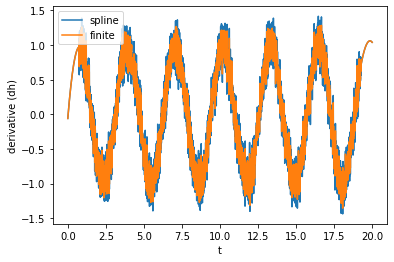

In [9]:
gw_spline_der = gw.spline_differentiated()
gw_numer_der = gw.differentiated()

plot(gw_spline_der, label='spline')
plot(gw_numer_der, lab1="derivative (dh)", label='finite')
plt.legend()

Clearly, derivatives will be noisier than the actual data, so often it is convenient to smooth them out as shown before.

TimeSeries support complex signals. Now, we will create one using `gw` itself. We will copy `gw`, time-shift it, find the common time interval with the original `gw`, and use that as a the imaginary part.

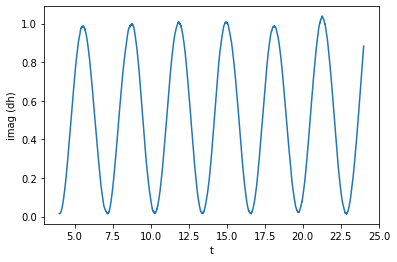

In [10]:
gw_imag = gw.copy()  # It is important to deep copy the object
gw_imag.time_shift(4)

plot(gw_imag, lab1 ="imag (dh)")

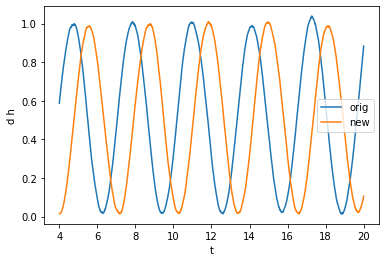

In [11]:
gw, gw_imag = series.sample_common([gw, gw_imag], resample=True)  # Resampling to common times

plot(gw, label="orig")
plot(gw_imag, label="new")
plt.legend()

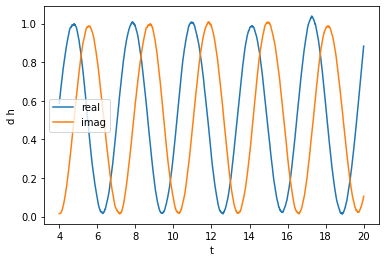

In [12]:
gw_complex = ts.TimeSeries(gw.t, gw.y + 1j * gw_imag.y)

plot(gw_complex.real(), label="real")
plot(gw_complex.imag(), label="imag")
plt.legend()

We can also compute the phase and absolute value. In particular, we will compute the unfolded phase (no wrapping over $2\pi$)

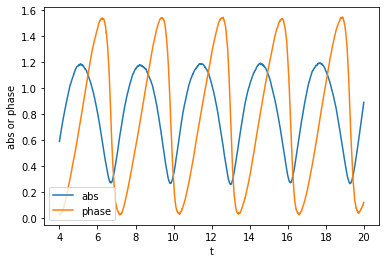

In [13]:
plot(gw_complex.abs(), label='abs')
plot(gw_complex.unfolded_phase(), lab1="abs or phase", label='phase')
plt.legend()

Here, the unfolded phase looks a little bit unusual. This is because we made up the signal.

We can also compute the frequency of the phase, which we can directly smooth.

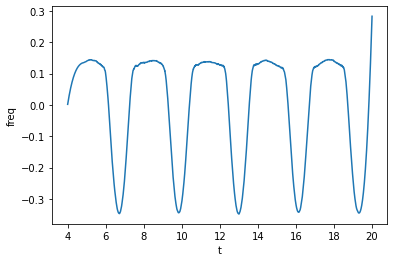

In [14]:
plot(gw_complex.phase_frequency(tsmooth=1.5), lab1="freq")

Next, we will take a Fourier transform. Before, let's pretend that the signal was in geometrized units (as in simulations), and let's make it physical assuming a scale of $M = 1 M_\odot$. For that, use the [unitconv](../unitconv.rst) module. We define a CU object that knows how to convert units.

In [15]:
CU = uc.geom_umass_msun(1) 

# How to convert from geometrized length to physical length?
# Simply multiply times CU.length. Let's check that it is 1.477 km
CU.length  # m

1476.6436994724972

Now we rescale `gw`, assuming that `y` is strain times distance (as usually is). Let's assume a distance of 500 Mpc.

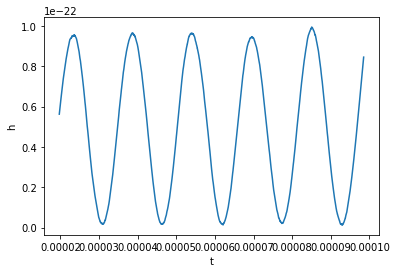

In [16]:
d_Mpc = 500

# inverse = True means from geometrized to physical
gw_physical = gw_complex.time_unit_changed(CU.time, inverse=True)  

gw_physical *= CU.length  # dh -> dh physical
# Now just the strain, since we assume a distance
gw_physical /= (d_Mpc * uc.MEGAPARSEC_SI)

# We have to manually add the redshift
gw_physical.redshifted(luminosity_distance_to_redshift(d_Mpc))

plot(gw_physical.real(), lab1="h")

Okay, now before taking the Fourier transform, we will remove the mean and window our signal. A Tukey window will work.

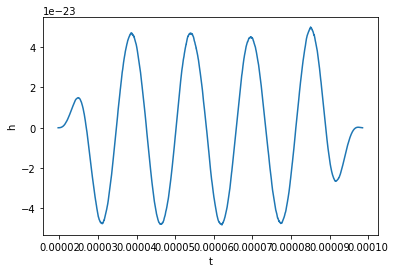

In [17]:
gw_physical.mean_remove()
gw_physical.tukey_window(0.3)
plot(gw_physical.real(), lab1="h")

Finally, we can take the Fourier transform. This is easy to do:

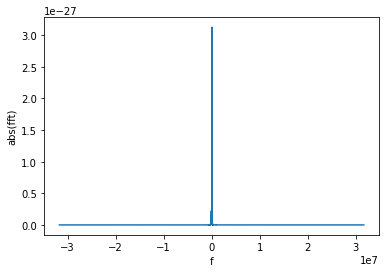

In [18]:
gw_fft = gw_physical.to_FrequencySeries()

# Plotting the amplitude of the Fourier transform
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")

The new object is a `FrequencySeries`. It is very similar to a `TimeSeries` and it shares several properties, methods, and features. 

Let's restrict to only positive frequencies close to zero.

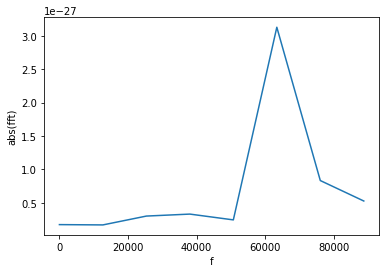

In [19]:
gw_fft.crop(0, 1e5)
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")

We can find the frequency of that peak! For this, we find all the peaks with amplitude larger than 1e-27.

Frequency: 64153.37


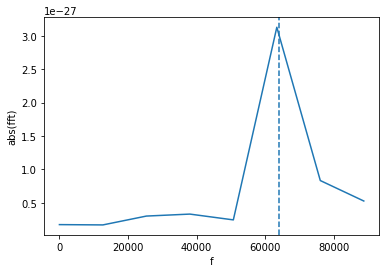

In [20]:
f_peak = gw_fft.peaks_frequencies(1e-27)[0]

print(f"Frequency: {f_peak:.2f}")
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")
plt.axvline(f_peak, ls = 'dashed')

The line is not on the maximum because we use a quadratic interpolation to find a more accurate location of the peak.

Sometimes, it is useful to ignore some data (or example, when we know that the data is invalid). `Series` objects support _masks_ to mark the points we want to ignore. Most functions work transparently with masks: for example, if you ask for the mean of a `Series`, the masked point will be ignored. Other functions do not support masks (most notably, splines). In that case, it is best to completely remove the masked points and work with clean data.

In [21]:
# Let's mask all the point in the spectrum with value larger than 1e-27

spectrum = gw_fft.abs()

print(f"Maximum without mask {spectrum.max():.3e}")

# Apply mask
spectrum.mask_greater(1e-27)

print(f"Maximum with mask {spectrum.max():.3e}")

print(f"Length with mask {len(spectrum)}")

# Remove points
spectrum.mask_remove()

print(f"Length after having removed the masked points {len(spectrum)}")

Maximum without mask 3.127e-27
Maximum with mask 8.334e-28
Length with mask 8
Length after having removed the masked points 7
